In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u

In [16]:
df_simlist = pd.read_csv('../data/results_combined/merged_with_dr14/EXOD_simlist.csv', dtype={'obsid':str})
df_simlist

,obsid,size_arcsec,time_interval,gti_only,remove_partial_ccd_frames,clobber,precomputed_bayes_limit,min_energy,max_energy,status
0,0914190201,20.0,5,False,True,False,3,0.2,2.0,NotImplementedError | No EPIC OBSMLI file found!
1,0914190201,20.0,5,False,True,False,3,2.0,12.0,NotImplementedError | No EPIC OBSMLI file found!
2,0914190201,20.0,5,False,True,False,3,0.2,12.0,NotImplementedError | No EPIC OBSMLI file found!
3,0914190201,20.0,50,False,True,False,3,0.2,2.0,NotImplementedError | No EPIC OBSMLI file found!
4,0914190201,20.0,50,False,True,False,3,2.0,12.0,NotImplementedError | No EPIC OBSMLI file found!
...,...,...,...,...,...,...,...,...,...,...
135949,0932391001,20.0,50,False,True,False,3,2.0,12.0,Run
135950,0932391001,20.0,50,False,True,False,3,0.2,12.0,Run
135951,0932391001,20.0,200,False,True,False,3,0.2,2.0,Run
135952,0932391001,20.0,200,False,True,False,3,2.0,12.0,Run


In [4]:
df_regions = pd.read_csv('../data/results_combined/merged_with_dr14/df_regions.csv')
df_regions

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,weighted_centroid-0,weighted_centroid-1,intensity_mean,...,area_bbox,x_img,y_img,X,Y,ra,dec,ra_deg,dec_deg,runid
0,0,32,22,33,23,32.000000,22.000000,32.000000,22.000000,12.000000,...,1.0,200.930233,130.604651,16074.418605,10448.372093,0h39m12.29s,-43d49m30.54s,9.801227,-43.825151,0911990501_0_5_0.2_2.0
1,1,40,31,41,32,40.000000,31.000000,40.000000,31.000000,135.000000,...,1.0,241.116279,175.813953,19289.302326,14065.116279,0h38m57.42s,-43d46m30.02s,9.739232,-43.775004,0911990501_0_5_0.2_2.0
2,2,45,77,46,78,45.000000,77.000000,45.000000,77.000000,211.000000,...,1.0,266.232558,406.883721,21298.604651,32550.697674,0h38m48.05s,-43d31m05.87s,9.700222,-43.518297,0911990501_0_5_0.2_2.0
3,3,74,71,75,72,74.000000,71.000000,74.000000,71.000000,156.000000,...,1.0,411.906977,376.744186,32952.558140,30139.534884,0h37m54.46s,-43d33m06.26s,9.476927,-43.551739,0911990501_0_5_0.2_2.0
4,4,78,57,79,58,78.000000,57.000000,78.000000,57.000000,135.000000,...,1.0,432.000000,306.418605,34560.000000,24513.488372,0h37m47.02s,-43d37m47.42s,9.445900,-43.629838,0911990501_0_5_0.2_2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60122,0,35,47,40,50,37.666667,47.777778,38.481181,47.907398,45252.111111,...,15.0,288.742675,310.976696,23099.414029,24878.135679,9h55m50.90s,69d40m45.25s,148.962088,69.679237,0932391001_0_200_0.2_12.0
60123,1,35,52,36,53,35.000000,52.000000,35.000000,52.000000,1879.000000,...,1.0,271.255814,331.534884,21700.465116,26522.790698,9h56m04.37s,69d42m07.33s,149.018201,69.702035,0932391001_0_200_0.2_12.0
60124,2,37,53,38,54,37.000000,53.000000,37.000000,53.000000,2747.000000,...,1.0,281.302326,336.558140,22504.186047,26924.651163,9h55m56.65s,69d42m27.52s,148.986061,69.707644,0932391001_0_200_0.2_12.0
60125,3,43,44,44,45,43.000000,44.000000,43.000000,44.000000,1407.000000,...,1.0,311.441860,291.348837,24915.348837,23307.906977,9h55m33.47s,69d39m26.85s,148.889440,69.657460,0932391001_0_200_0.2_12.0


In [36]:
from exod.post_processing.crossmatch_simulation import get_unique_sources
df_regions_unique = get_unique_sources(df_regions)

2024-05-28 09:35:33,759 - INFO - crossmatch_simulation.py:get_unique_sources - A total of 38648 unique sources were found from 60127 sources within a clustering radius of 0.25 arcsec


In [ ]:
ra_deg=df_regions_unique['ra_deg']
dec_deg=df_regions_unique['dec_deg']
sky_coords = SkyCoord(ra=ra_deg, dec=dec_deg, unit='deg', frame='fk5', equinox='J2000')
gal_coords = sky_coords.galactic

l = -gal_coords.l.wrap_at(180 * u.deg).radian
b = gal_coords.b.radian

# Calculate the density of points (this is kinda slow)
#xy = np.vstack([l,b])
#z = gaussian_kde(xy)(xy)


fig = plt.figure(figsize=(5, 2.9))

plt.subplot(111, projection='aitoff')
#plt.grid(linewidth=0.5)
#plt.scatter(l, b, marker='.', s=1, color='cyan', rasterized=True)
plt.scatter(l, b, marker='.', s=1, c=z, cmap=cmasher.cosmic, rasterized=True)
plt.tight_layout()

xticks = ['210°','240°','270°','300°','330°','0°','30°','60°','90°','120°','150°']
plt.xticks(fig.get_axes()[0].get_xticks(), xticks)
#plt.xlabel('Galactic longitude (l)')
#plt.ylabel('Galactic latitude (b)')
plt.savefig('../data/plots/unique_sources.png')
plt.savefig('../data/plots/unique_sources.pdf', dpi=300)

plt.show()

In [40]:
df_regions_unique['count'].value_counts(normalize=True)*100

count
1    60.805216
2    30.332747
3     4.310702
4     2.784103
6     0.910785
5     0.825398
7     0.028462
8     0.002587
Name: proportion, dtype: float64

In [5]:
df_regions_soft = df_regions[df_regions['runid'].str.contains('0.2_2.0')]
df_regions_hard = df_regions[df_regions['runid'].str.contains('0.2_12.0')]

In [6]:
df_regions_soft

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,weighted_centroid-0,weighted_centroid-1,intensity_mean,...,area_bbox,x_img,y_img,X,Y,ra,dec,ra_deg,dec_deg,runid
0,0,32,22,33,23,32.000000,22.000000,32.000000,22.000000,12.0,...,1.0,200.930233,130.604651,16074.418605,10448.372093,0h39m12.29s,-43d49m30.54s,9.801227,-43.825151,0911990501_0_5_0.2_2.0
1,1,40,31,41,32,40.000000,31.000000,40.000000,31.000000,135.0,...,1.0,241.116279,175.813953,19289.302326,14065.116279,0h38m57.42s,-43d46m30.02s,9.739232,-43.775004,0911990501_0_5_0.2_2.0
2,2,45,77,46,78,45.000000,77.000000,45.000000,77.000000,211.0,...,1.0,266.232558,406.883721,21298.604651,32550.697674,0h38m48.05s,-43d31m05.87s,9.700222,-43.518297,0911990501_0_5_0.2_2.0
3,3,74,71,75,72,74.000000,71.000000,74.000000,71.000000,156.0,...,1.0,411.906977,376.744186,32952.558140,30139.534884,0h37m54.46s,-43d33m06.26s,9.476927,-43.551739,0911990501_0_5_0.2_2.0
4,4,78,57,79,58,78.000000,57.000000,78.000000,57.000000,135.0,...,1.0,432.000000,306.418605,34560.000000,24513.488372,0h37m47.02s,-43d37m47.42s,9.445900,-43.629838,0911990501_0_5_0.2_2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60112,0,8,28,9,29,8.000000,28.000000,8.000000,28.000000,43.0,...,1.0,135.627907,210.976744,10850.232558,16878.139535,9h57m47.71s,69d34m01.71s,149.448806,69.567141,0932391001_0_50_0.2_2.0
60113,1,15,44,16,45,15.000000,44.000000,15.000000,44.000000,246.0,...,1.0,170.790698,291.348837,13663.255814,23307.906977,9h57m21.34s,69d39m24.43s,149.338923,69.656786,0932391001_0_50_0.2_2.0
60114,2,38,47,40,49,38.666667,47.666667,38.644984,47.830938,39725.0,...,4.0,289.565502,310.592617,23165.240189,24847.409381,9h55m50.27s,69d40m43.72s,148.959454,69.678812,0932391001_0_50_0.2_2.0
60117,0,37,45,38,46,37.000000,45.000000,37.000000,45.000000,6453.0,...,1.0,281.302326,296.372093,22504.186047,23709.767442,9h55m56.59s,69d39m46.78s,148.985793,69.662993,0932391001_0_200_0.2_2.0


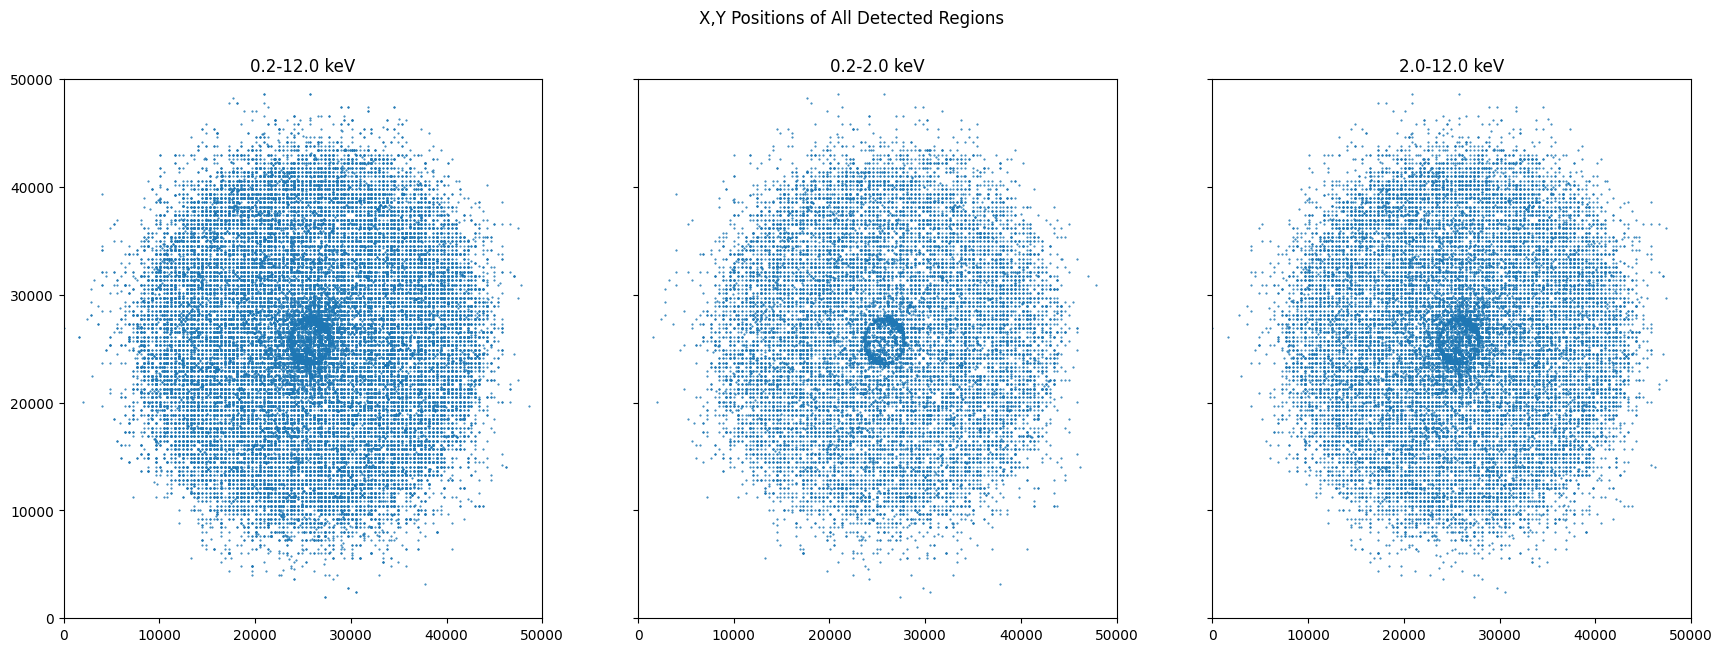

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(21,7), sharex=True, sharey=True)
ax[0].scatter(df_regions['X'], df_regions['Y'], marker='.', s=1)
ax[1].scatter(df_regions_soft['X'], df_regions_soft['Y'], marker='.', s=1)
ax[2].scatter(df_regions_hard['X'], df_regions_hard['Y'], marker='.', s=1)

ax[0].set_title('0.2-12.0 keV')
ax[1].set_title('0.2-2.0 keV')
ax[2].set_title('2.0-12.0 keV')


for a in ax:
    a.set_xlim(0,50000)
    a.set_ylim(0,50000)
plt.suptitle('X,Y Positions of All Detected Regions')
plt.show()

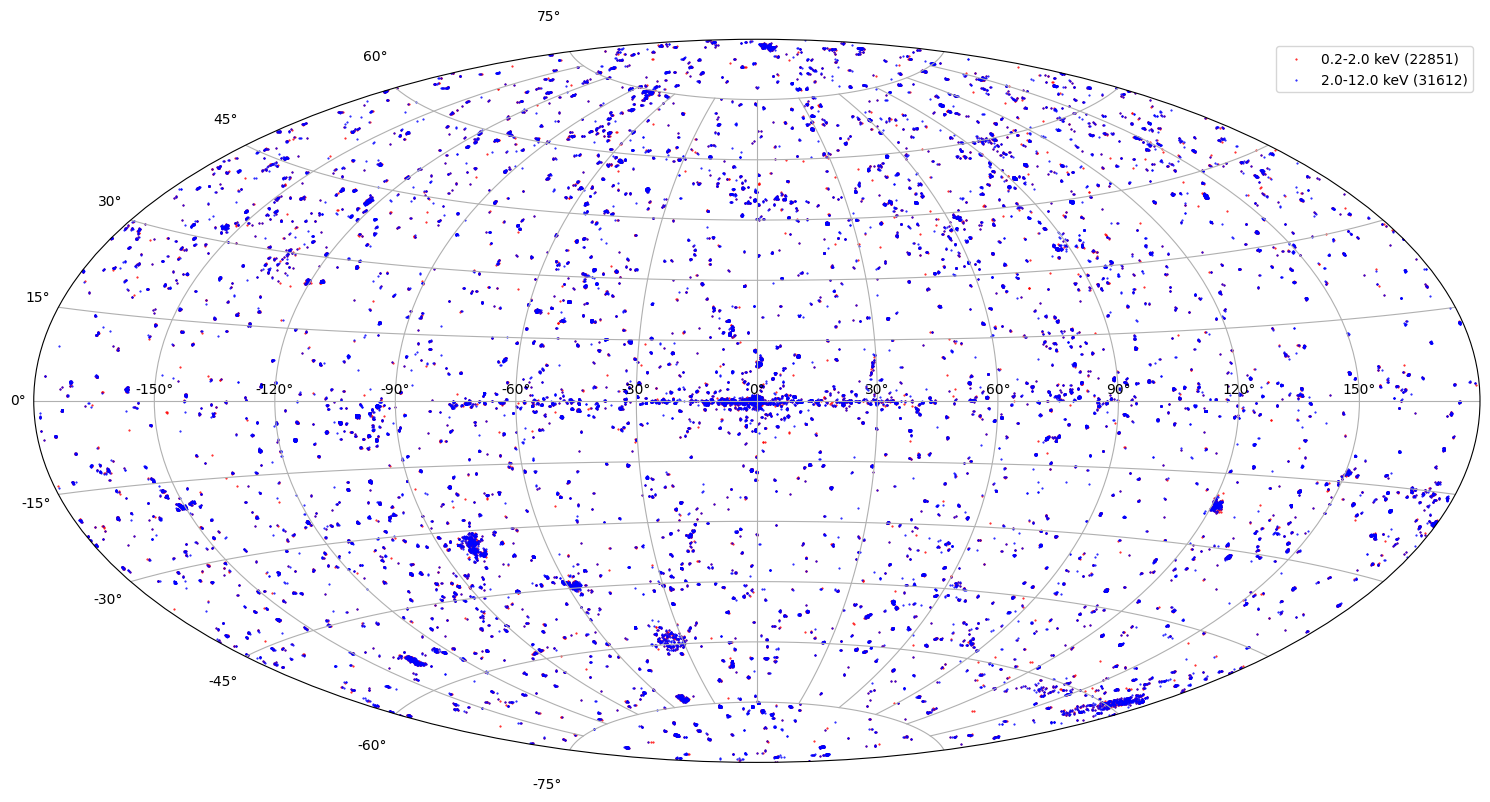

In [8]:
E = ['0.2-2.0 keV','2.0-12.0 keV']
c = ['red', 'blue']
dfs = [df_regions_soft, df_regions_hard]

plt.figure(figsize=(15, 10))
plt.subplot(111, projection='aitoff')
for i, df in enumerate(dfs):
    sky_coords = SkyCoord(ra=df['ra_deg'].values, dec=df['dec_deg'].values, unit='deg', frame='icrs')
    galactic_coords = sky_coords.galactic
    plt.scatter(galactic_coords.l.wrap_at(180 * u.deg).radian, galactic_coords.b.radian, marker='.', label=f'{E[i]} ({len(df)})', s=1.0, color=c[i])
    
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
df_regions['area_bbox'].value_counts(normalize=True)

area_bbox
1.0      0.833386
2.0      0.066077
4.0      0.042211
6.0      0.015683
9.0      0.009147
           ...   
140.0    0.000017
961.0    0.000017
840.0    0.000017
308.0    0.000017
304.0    0.000017
Name: proportion, Length: 135, dtype: float64

In [10]:
df_evt = pd.read_csv('../data/results_combined/merged_with_dr14/df_evt_info.csv')

In [44]:
df_evt['instrument'].value_counts(normalize=True)*100

instrument
['EMOS1', 'EMOS2', 'EPN']    86.147570
['EMOS1', 'EMOS2']           12.686870
['EPN']                       0.828561
['EMOS1', 'EPN']              0.098819
['EMOS2']                     0.098819
['EMOS2', 'EPN']              0.093752
['EMOS1']                     0.045609
Name: proportion, dtype: float64

(0.0, 4500.0)

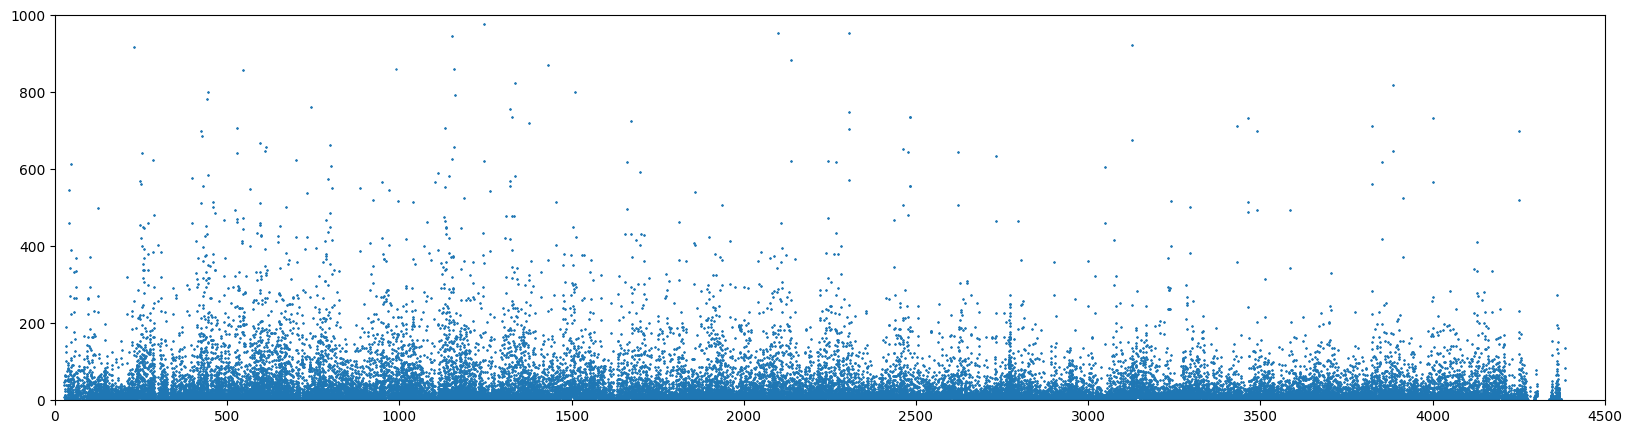

In [49]:
plt.figure(figsize=(20,5))
plt.scatter(df_evt['revolution'], df_evt['mean_rate'], s=1, marker='.')
plt.ylim(0,1000)
plt.xlim(0,4500)

In [72]:
import mpl_scatter_density

In [13]:
df_dc = pd.read_csv('../data/results_combined/merged_with_dr14/df_dc_info.csv')
df_dc

,event_list,size_arcsec,time_interval,n_t_bins,n_bti_bin,n_gti_bin,gti_frac,bti_frac,n_bccd_bin,bccd_frac,bbox_img,shape,total_values,memory_mb,runid
0,"['P0911990501M1S001MIEVLI0000_FILT.fits', 'P09...",20.0,5,24695,3334,21361,0.864993,0.135007,3874,0.156874,"(8, 116, 4, 112)","(108, 108, 24695)",288042480,2197.589722,0911990501_0_5_0.2_2.0
1,"['P0911990501M1S001MIEVLI0000_FILT.fits', 'P09...",20.0,5,24695,3334,21361,0.864993,0.135007,3874,0.156874,"(8, 116, 4, 112)","(108, 108, 24695)",288042480,2197.589722,0911990501_0_5_2.0_12.0
2,"['P0911990501M1S001MIEVLI0000_FILT.fits', 'P09...",20.0,5,24695,3334,21361,0.864993,0.135007,3874,0.156874,"(8, 116, 4, 112)","(108, 108, 24695)",288042480,2197.589722,0911990501_0_5_0.2_12.0
3,"['P0911990501M1S001MIEVLI0000_FILT.fits', 'P09...",20.0,50,2469,339,2130,0.862697,0.137303,411,0.166464,"(8, 116, 4, 112)","(108, 108, 2469)",28798416,219.714478,0911990501_0_50_0.2_2.0
4,"['P0911990501M1S001MIEVLI0000_FILT.fits', 'P09...",20.0,50,2469,339,2130,0.862697,0.137303,411,0.166464,"(8, 116, 4, 112)","(108, 108, 2469)",28798416,219.714478,0911990501_0_50_2.0_12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118393,"['P0932391001M1U003MIEVLI0000_FILT.fits', 'P09...",20.0,50,885,416,469,0.529944,0.470056,200,0.225989,"(19, 116, 14, 105)","(97, 91, 885)",7811895,59.600029,0932391001_0_50_2.0_12.0
118394,"['P0932391001M1U003MIEVLI0000_FILT.fits', 'P09...",20.0,50,885,416,469,0.529944,0.470056,200,0.225989,"(19, 116, 14, 105)","(97, 91, 885)",7811895,59.600029,0932391001_0_50_0.2_12.0
118395,"['P0932391001M1U003MIEVLI0000_FILT.fits', 'P09...",20.0,200,221,97,124,0.561086,0.438914,0,0.000000,"(19, 116, 14, 105)","(97, 91, 221)",1950767,14.883171,0932391001_0_200_0.2_2.0
118396,"['P0932391001M1U003MIEVLI0000_FILT.fits', 'P09...",20.0,200,221,97,124,0.561086,0.438914,0,0.000000,"(19, 116, 14, 105)","(97, 91, 221)",1950767,14.883171,0932391001_0_200_2.0_12.0


Text(0, 0.5, 'bti_frac')

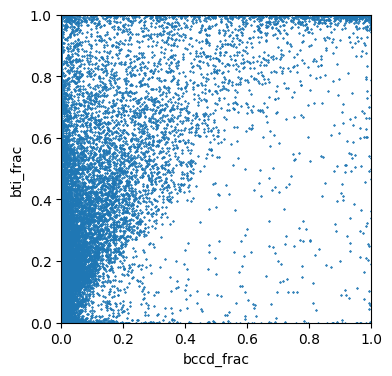

In [71]:
plt.figure(figsize=(4,4))
plt.scatter(df_dc['bccd_frac'], df_dc['bti_frac'], s=0.5, marker='.')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('bccd_frac')
plt.ylabel('bti_frac')
